# **Dataset 1: Metabric breast cancer**

In [ ]:
pip install pandas

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from scipy.stats import mode
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns

## **Load Dataset**

In [ ]:
df_metabric = pd.read_csv('../input/breast-cancer-metabric/Breast Cancer METABRIC.csv')
df_metabric.head()

### **Shape and Column Data Types**

In [ ]:
df_metabric.shape

---


## **1.Handle missing values**


*   Check the missing values in the selected columns:



In [ ]:
columns = ['Inferred Menopausal State','Tumor Size','Lymph nodes examined positive',
           'Neoplasm Histologic Grade','Pam50 + Claudin-low subtype', 'Cancer Type Detailed',
           'ER Status', 'PR Status', 'HER2 Status', 'Chemotherapy', 'Radio Therapy',
           'Type of Breast Surgery', 'Primary Tumor Laterality', 'Overall Survival Status',
           'Overall Survival (Months)', 'Relapse Free Status (Months)','Relapse Free Status' ]

missing_counts = df_metabric[columns].isnull().sum()
missing_columns = missing_counts[missing_counts > 0].index.tolist()

print("Columns with missing values:")
for column in missing_columns:
    print(f"{column}: {missing_counts[column]} missing values")

In [ ]:
# Select only the specified columns from the DataFrame
selected_data = df_metabric[columns]

# Create a bar plot for missing values in the selected columns
fig = plt.figure(figsize=(12, 8))
sns.barplot(x=selected_data.isnull().sum().sort_values(ascending=False).values,
            y=selected_data.isnull().sum().sort_values(ascending=False).index,
            palette='Blues_d')

plt.xlabel('Number of Missing Rows', size=12, labelpad=10)
plt.ylabel('')
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.title('Missing Values in Selected Columns', size=12, pad=10)

plt.show()




---


- Handle the missing values:


In [ ]:
# Event and duration columns
df_metabric['Relapse Free Status'] = df_metabric.groupby(['Cancer Type Detailed'])['Relapse Free Status'].apply(lambda x: x.fillna(mode(x)[0][0]))
df_metabric['Relapse Free Status (Months)'] = df_metabric.groupby(['Cancer Type Detailed', 'Relapse Free Status'])['Relapse Free Status (Months)'].apply(lambda x: x.fillna(x.mean()))
df_metabric['Overall Survival Status'] = df_metabric.groupby(['Cancer Type Detailed', 'Relapse Free Status'])['Overall Survival Status'].apply(lambda x: x.fillna(mode(x)[0][0]))
df_metabric['Overall Survival (Months)'] = df_metabric.groupby(['Cancer Type Detailed', 'Overall Survival Status'])['Overall Survival (Months)'].apply(lambda x: x.fillna(x.mean()))

# ER, PR, HER2 status columns
df_metabric['ER status measured by IHC'] = df_metabric['ER status measured by IHC'].fillna(mode(df_metabric['ER status measured by IHC'])[0][0])
df_metabric['ER Status'] = df_metabric.groupby(['ER status measured by IHC'])['ER Status'].apply(lambda x: x.fillna(mode(x)[0][0]))
df_metabric['HER2 status measured by SNP6'] = df_metabric['HER2 status measured by SNP6'].fillna(mode(df_metabric['HER2 status measured by SNP6'])[0][0])
df_metabric['HER2 Status'] = df_metabric.groupby(['HER2 status measured by SNP6'])['HER2 Status'].apply(lambda x: x.fillna(mode(x)[0][0]))
df_metabric['PR Status'] = df_metabric.groupby(['Cancer Type Detailed'])['PR Status'].apply(lambda x: x.fillna(mode(x)[0][0]))

# Chemotherapy, Hormone Therapy, Radio Therapy columns
df_metabric['Chemotherapy'] = df_metabric.groupby(['Cancer Type Detailed'])['Chemotherapy'].apply(lambda x: x.fillna(mode(x)[0][0]))
df_metabric['Radio Therapy'] = df_metabric.groupby(['Cancer Type Detailed'])['Radio Therapy'].apply(lambda x: x.fillna(mode(x)[0][0]))

# Other columns
df_metabric['Tumor Size'] = df_metabric.groupby(['Cancer Type Detailed', 'Tumor Stage'])['Tumor Size'].apply(lambda x: x.fillna(x.median()))
df_metabric['Tumor Size'] = df_metabric.groupby(['Cancer Type Detailed'])['Tumor Size'].apply(lambda x: x.fillna(x.median()))
df_metabric['Tumor Size'] = df_metabric['Tumor Size'].fillna(mode(df_metabric['Tumor Size'])[0][0])
df_metabric['Neoplasm Histologic Grade'] = df_metabric.groupby(['Cancer Type Detailed'])['Neoplasm Histologic Grade'].apply(lambda x: x.fillna(x.mode()))
df_metabric['Neoplasm Histologic Grade'] = df_metabric['Neoplasm Histologic Grade'].fillna(mode(df_metabric['Neoplasm Histologic Grade'])[0][0])
df_metabric['Primary Tumor Laterality'] = df_metabric.groupby(['Cancer Type Detailed'])['Primary Tumor Laterality'].apply(lambda x: x.fillna(x.mode()))
df_metabric['Lymph nodes examined positive'] = df_metabric.groupby(['Cancer Type Detailed'])['Lymph nodes examined positive'].apply(lambda x: x.fillna(x.mode()))
df_metabric['Lymph nodes examined positive'] = df_metabric['Lymph nodes examined positive'].fillna(mode(df_metabric['Lymph nodes examined positive'])[0][0])
df_metabric['Inferred Menopausal State'] = df_metabric['Inferred Menopausal State'].fillna(mode(df_metabric['Inferred Menopausal State'])[0][0])
df_metabric['Pam50 + Claudin-low subtype'] = df_metabric.groupby(['Cancer Type Detailed'])['Pam50 + Claudin-low subtype'].apply(lambda x: x.fillna(mode(x)[0][0]))
df_metabric['Type of Breast Surgery'] = df_metabric.groupby(['Cancer Type Detailed'])['Type of Breast Surgery'].apply(lambda x: x.fillna(mode(x)[0][0]))
df_metabric['Primary Tumor Laterality'] = df_metabric.groupby(['Cancer Type Detailed'])['Primary Tumor Laterality'].apply(lambda x: x.fillna(mode(x)[0][0]))


In [ ]:
# Select only the specified columns from the DataFrame
selected_data = df_metabric[columns]

# Create a bar plot for missing values in the selected columns
fig = plt.figure(figsize=(12, 8))
sns.barplot(x=selected_data.isnull().sum().sort_values(ascending=False).values,
            y=selected_data.isnull().sum().sort_values(ascending=False).index,
            palette='Reds_d')

plt.xlabel('Number of Missing Rows', size=12, labelpad=10)
plt.ylabel('')
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.title('Missing Values in Selected Columns', size=12, pad=10)

plt.show()

---
## **2. Select and Rename the columns**

In [ ]:
# Dataset 1

selected_columns_1 = df_metabric[['Patient ID',
                         'Inferred Menopausal State',
                         'Tumor Size',
                         'Lymph nodes examined positive',
                         'Neoplasm Histologic Grade',
                         'Pam50 + Claudin-low subtype',
                         'Cancer Type Detailed',
                         'ER Status',
                         'PR Status',
                         'HER2 Status',
                         'Chemotherapy',
                         'Radio Therapy',
                         'Type of Breast Surgery',
                         'Primary Tumor Laterality',
                         'Overall Survival (Months)',
                         'Overall Survival Status',
                         'Relapse Free Status (Months)',
                         'Relapse Free Status'
                         ]]

# Select & Rename
selected_columns_1 = selected_columns_1.rename(columns={
    'Patient ID': 'Patient ID',
    'Inferred Menopausal State': 'Menopausal Status',
    'Tumor Size': 'Tumor Size',
    'Lymph nodes examined positive': 'Lymph Node Status',
    'Neoplasm Histologic Grade': 'Tumor Grade',
    'Pam50 + Claudin-low subtype': 'Mol Subtype',
    'Cancer Type Detailed': 'Histological Type',
    'ER Status': 'ER',
    'PR Status': 'PR',
    'HER2 Status': 'HER2',
    'Chemotherapy': 'Chemotherapy',
    'Radio Therapy': 'Radiotherapy',
    'Type of Breast Surgery': 'Type of Surgery',
    'Primary Tumor Laterality': 'Tumor Location',
    'Overall Survival (Months)': 'Overall Survival Status (Month)',
    'Overall Survival Status': 'Overall Survival Status',
    'Relapse Free Status (Months)': 'Recurrence Free Status (Month)',
    'Relapse Free Status': 'Recurrence Free Status'
    })


# Put columns in new excel
selected_columns_1.to_excel('Dataset_1.xlsx', index=False)



---



---
## **3. Normalization**
Normalize or scale the numerical values with wide range.

*   Tumor size
*   Lymph node









---



*   Before normalization



In [ ]:
Data1 = pd.read_excel('Dataset_1.xlsx')
Data1.boxplot(column = ['Tumor Size'], fontsize = 15, figsize=(3,3))

In [ ]:
Data1.boxplot(column = ['Lymph Node Status'], fontsize = 15, figsize=(3,3))

In [ ]:
# Scale the Tumor size

def update_tumor_size(value):
    if value <= 2:
        return 1
    elif value > 2 and value <= 4:
        return 2
    elif value > 4 and value <= 6:
        return 3
    else:
        return 4

Data1['Tumor Size'] = Data1['Tumor Size'].apply(update_tumor_size)


# Scale the lymph node status
def update_lymph_node_status(value):
    if pd.isnull(value):  # Check if the value is empty
        return -1
    elif value == 0:
        return 0
    elif value >= 1 and value <= 3:
        return 1
    elif value >= 4 and value <= 9:
        return 2
    else:
        return 3

Data1['Lymph Node Status'] = Data1['Lymph Node Status'].apply(update_lymph_node_status)


In [ ]:
Data1.to_excel('Dataset_1.xlsx', index=False)

In [ ]:
Data1

---
---
---

# **Dataset2: Duke university**

In [ ]:
Data2= pd.read_excel('/kaggle/input/dataset-duke-university/Clinical_and_Other_Features_Final.xlsx')
Data2.head()

### **Shape and Column Data Types**

In [ ]:
Data2.shape

###    **Get the desired** **columns**

In [ ]:
#Dataset_2

selected_columns_2 = Data2[[
    'Patient ID',
    'Menopause (at diagnosis)',
    'Staging(Tumor Size)# [T]',
    'Staging(Nodes)#(Nx replaced by -1)[N]',
    'Nottingham grade',
    'Mol Subtype',
    'Histologic type',
    'ER',
    'PR',
    'HER2',
    'Chemo Therapy',
    'Radio Therapy',
    'Definitive Surgery Type',
    'Tumor Location',
    'Days to death (from the date of diagnosis) ',
    'Overall Survival Status',
    'Days to local recurrence (from the date of diagnosis) ',
    'Recurrence event(s)'



  ]]

# Select & Rename
selected_columns_2 = selected_columns_2.rename(columns={
    'Patient ID': 'Patient ID',
    'Menopause (at diagnosis)': 'Menopausal Status',
    'Staging(Tumor Size)# [T]': 'Tumor Size',
    'Staging(Nodes)#(Nx replaced by -1)[N]': 'Lymph Node Status',
    'Nottingham grade': 'Tumor Grade',
    'Mol Subtype': 'Mol Subtype',
    'Histologic type': 'Histological Type',
    'ER': 'ER',
    'PR': 'PR',
    'HER2': 'HER2',
    'Chemo Therapy': 'Chemotherapy',
    'Radio Therapy': 'Radiotherapy',
    'Definitive Surgery Type': 'Type of Surgery',
    'Tumor Location': 'Tumor Location',
    'Days to death (from the date of diagnosis) ': 'Overall Survival Status (Month)',
    'Overall Survival Status': 'Overall Survival Status',
    'Days to local recurrence (from the date of diagnosis) ': 'Recurrence Free Status (Month)',
    'Recurrence event(s)': 'Recurrence Free Status'








})


# Put columns in new excel
selected_columns_2.to_excel('Dataset_2.xlsx', index=False)


### **Transformation of Dataset_2 like Dataset_1**


In [ ]:
#transformation of Dataset_2 like Dataset_1

data = pd.read_excel('Dataset_2.xlsx')

# Define mappings for each categorical feature
mapping_MenopausalStatus = {
    0: 'Pre',
    1: 'Post',
    2: 'nan'
}

mapping_Recurrence = {
    0: 'Not Recurred',
    1: 'Recurred'
}

mapping_ER = {
    0: 'Negative',
    1: 'Positive'
}


mapping_PR = {
    0: 'Negative',
    1: 'Positive'
}


mapping_HER2 = {
    0: 'Negative',
    1: 'Positive',
    2: 'Borderline'
}


mapping_TunorLocation = {
    'L': 'Left',
    'R': 'Right'
}


mapping_Surgery = {
    0: 'Breast Conserving',
    1: 'Mastectomy'
}

mapping_HistologicalType = {
    0: 'DCIS',
    1: 'Breast Invasive Ductal Carcinoma',
    2: 'Breast Invasive Lobular Carcinoma',
    3: 'Metaplastic Breast Cancer',
    4: 'LCIS',
    5: 'tubular',
    6: 'Breast Mixed Ductal and Lobular Carcinoma',
    7: 'micropapillary',
    8: 'colloid',
    9: 'Breast Invasive Mixed Mucinous Carcinoma',
    10: 'medullary'
}

mapping_MolSubtype = {
    0: 'LumA',
    1: 'LumB',
    2: 'Her2',
    3: 'Basal'
}

mapping_Chemo = {
    0: 'No',
    1: 'Yes'
}

mapping_Radio = {
    0: 'No',
    1: 'Yes'
}

mapping_TumorGrade = {
    1:1.0,
    2:2.0,
    3:3.0
}

# Revert numerical categories back to original strings for each feature
data['Menopausal Status'] = data['Menopausal Status'].map(mapping_MenopausalStatus)
data['Recurrence Free Status'] = data['Recurrence Free Status'].map(mapping_Recurrence)
data['ER'] = data['ER'].map(mapping_ER)
data['PR'] = data['PR'].map(mapping_PR)
data['HER2'] = data['HER2'].map(mapping_HER2)
data['Tumor Location'] = data['Tumor Location'].map(mapping_TunorLocation)
data['Type of Surgery'] = data['Type of Surgery'].map(mapping_Surgery)
data['Histological Type'] = data['Histological Type'].map(mapping_HistologicalType)
data['Mol Subtype'] = data['Mol Subtype'].map(mapping_MolSubtype)
data['Chemotherapy'] = data['Chemotherapy'].map(mapping_Chemo)
data['Radiotherapy'] = data['Radiotherapy'].map(mapping_Radio)
data['Tumor Grade'] = data['Tumor Grade'].map(mapping_TumorGrade)

# Save the DataFrame to an Excel file
data.to_excel('Dataset_2_transformed.xlsx', index=False)

In [ ]:
# Replace 'NP' values with NaN in each column
data.replace('NP', np.nan, inplace=True)

# Count occurrences of NaN in each column
nan_counts = data.isnull().sum()

# Display the counts
print("Occurrences of NaN in each column after replacing 'NP':")
print(nan_counts)

data.to_excel('Dataset_2_transformed.xlsx', index=False)

In [ ]:
Data2_trans = pd.read_excel('Dataset_2_transformed.xlsx')
Data2_trans.head()

In [ ]:
columns = ['Menopausal Status','Recurrence Free Status','Recurrence Free Status (Month)',
           'Overall Survival Status (Month)','Tumor Size','Lymph Node Status','Tumor Grade',
           'Mol Subtype','Histological Type','ER','PR','HER2','Chemotherapy','Radiotherapy',
           'Type of Surgery','Tumor Location','Overall Survival Status']

missing_counts = Data2_trans[columns].isnull().sum()
missing_columns = missing_counts[missing_counts > 0].index.tolist()

print("Columns with missing values:")
for column in missing_columns:
    print(f"{column}: {missing_counts[column]} missing values")

In [ ]:
# Select only the specified columns from the DataFrame
selected_data = Data2_trans[columns]

# Create a bar plot for missing values in the selected columns
fig = plt.figure(figsize=(12, 8))
sns.barplot(x=selected_data.isnull().sum().sort_values(ascending=False).values,
            y=selected_data.isnull().sum().sort_values(ascending=False).index,
            palette='Blues_d')

plt.xlabel('Number of Missing Rows', size=12, labelpad=10)
plt.ylabel('')
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.title('Missing Values in Selected Columns', size=12, pad=10)

plt.show()


## **Merging the two datasets**

In [ ]:
df_merged = pd.concat([Data1, Data2_trans], axis=0)

df_merged.to_csv('merged_data.csv', index=False)

In [ ]:
df_merged

In [ ]:
df_merged['Patient ID'] = 'Patient_' + df_merged.index.astype(str)
df_merged.to_csv('merged_data.csv', index=False)

In [ ]:
df_merged

## **Handle the missing values in the merged dataset**

In [ ]:
df_merged= pd.read_csv('/kaggle/working/merged_data.csv')
df_merged.head()

In [ ]:
df_merged.shape

In [ ]:
missing_counts = df_merged.isnull().sum()
missing_columns = missing_counts[missing_counts > 0].index.tolist()

print("Columns with missing values:")
for column in missing_columns:
    print(f"{column}: {missing_counts[column]} missing values")

In [ ]:
df_merged = df_merged.dropna(subset=['Histological Type'], how='any')
#df_cleaned.to_excel('Dataset_2_cleaned.xlsx', index=False)

In [ ]:
# Create a bar plot for missing values in the selected columns
fig = plt.figure(figsize=(12, 8))
sns.barplot(x=df_merged.isnull().sum().sort_values(ascending=False).values,
            y=df_merged.isnull().sum().sort_values(ascending=False).index,
            palette='Blues_d')

plt.xlabel('Number of Missing Rows', size=12, labelpad=10)
plt.ylabel('')
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.title('Missing Values in Selected Columns', size=12, pad=10)

plt.show()


In [ ]:
df_merged.drop(df_merged[df_merged['Chemotherapy'] == '0'].index, inplace=True)

In [ ]:
df_merged['Recurrence Free Status'] = df_merged.groupby(['Histological Type'])['Recurrence Free Status'].apply(lambda x: x.fillna(mode(x)[0][0]))
df_merged['Recurrence Free Status (Month)'] = df_merged.groupby(['Histological Type', 'Recurrence Free Status'])['Recurrence Free Status (Month)'].apply(lambda x: x.fillna(x.mean()))
df_merged['Overall Survival Status'] = df_merged.groupby(['Histological Type', 'Recurrence Free Status'])['Overall Survival Status'].apply(lambda x: x.fillna(mode(x)[0][0]))
df_merged['Overall Survival Status (Month)'] = df_merged.groupby(['Histological Type', 'Overall Survival Status'])['Overall Survival Status (Month)'].apply(lambda x: x.fillna(x.mean()))

# Chemotherapy, Hormone Therapy, Radio Therapy columns
df_merged['Chemotherapy'] = df_merged.groupby(['Histological Type'])['Chemotherapy'].apply(lambda x: x.fillna(mode(x)[0][0]))
df_merged['Radiotherapy'] = df_merged.groupby(['Histological Type'])['Radiotherapy'].apply(lambda x: x.fillna(mode(x)[0][0]))

# Other columns
df_merged['Tumor Size'] = df_merged.groupby(['Histological Type'])['Tumor Size'].apply(lambda x: x.fillna(x.median()))
df_merged['Tumor Size'] = df_merged['Tumor Size'].fillna(mode(df_merged['Tumor Size'])[0][0])
df_merged['Tumor Grade'] = df_merged.groupby(['Histological Type'])['Tumor Grade'].apply(lambda x: x.fillna(x.mode()))
df_merged['Tumor Grade'] = df_merged['Tumor Grade'].fillna(mode(df_merged['Tumor Grade'])[0][0])
df_merged['Tumor Location'] = df_merged.groupby(['Histological Type'])['Tumor Location'].apply(lambda x: x.fillna(x.mode()))
df_merged['Lymph Node Status'] = df_merged.groupby(['Histological Type'])['Lymph Node Status'].apply(lambda x: x.fillna(x.mode()))
df_merged['Lymph Node Status'] = df_merged['Lymph Node Status'].fillna(mode(df_merged['Lymph Node Status'])[0][0])
df_merged['Menopausal Status'] = df_merged['Menopausal Status'].fillna(mode(df_merged['Menopausal Status'])[0][0])
df_merged['Mol Subtype'] = df_merged.groupby(['Histological Type'])['Mol Subtype'].apply(lambda x: x.fillna(mode(x)[0][0]))
df_merged['Type of Surgery'] = df_merged.groupby(['Histological Type'])['Type of Surgery'].apply(lambda x: x.fillna(mode(x)[0][0]))
df_merged['Tumor Location'] = df_merged.groupby(['Histological Type'])['Tumor Location'].apply(lambda x: x.fillna(mode(x)[0][0]))


In [ ]:
# Create a bar plot for missing values in the selected columns
fig = plt.figure(figsize=(12, 8))
sns.barplot(x=df_merged.isnull().sum().sort_values(ascending=False).values,
            y=df_merged.isnull().sum().sort_values(ascending=False).index,
            palette='Reds_d')

plt.xlabel('Number of Missing Rows', size=12, labelpad=10)
plt.ylabel('')
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.title('Missing Values in Selected Columns', size=12, pad=10)

plt.show()

In [ ]:
missing_counts = df_merged.isnull().sum()
missing_columns = missing_counts[missing_counts > 0].index.tolist()

print("Columns with missing values:")
for column in missing_columns:
    print(f"{column}: {missing_counts[column]} missing values")


In [ ]:
columns_with_missing_values = ['Overall Survival Status (Month)',
                                'Recurrence Free Status (Month)']

# Drop rows with missing values in the specified columns
df_merged = df_merged.dropna(subset=columns_with_missing_values)

In [ ]:
df_merged.isna().sum()

In [ ]:
df_merged.to_csv('merged_data.csv', index=False)

_________________________________________________________________________________________________

## **EDA**

### **Check the balance of the target column**

In [ ]:
df_merged.head()

In [ ]:
df_merged.info()

In [ ]:
df_merged.isna().sum()

In [ ]:
df_merged.drop(df_merged[df_merged['Chemotherapy'] == 0].index, inplace=True)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Display the value counts
print(df_merged["Recurrence Free Status"].value_counts())

# Create a countplot
sns.countplot(data=df_merged, x='Recurrence Free Status', palette='pastel')

# Show the plot
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_columns = ['Menopausal Status','Tumor Size','Lymph Node Status','Tumor Grade',
                       'Mol Subtype','Histological Type','ER','PR','HER2','Chemotherapy',
                       'Radiotherapy','Tumor Location','Overall Survival Status']

# Create countplots for categorical variables
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=df_merged, palette='pastel')
    plt.title(f'Countplot of {column}')
    plt.show()

In [ ]:
df_merged.to_csv('merged_data.csv', index=False)

# Baheya recurrence dataset Grad

In [ ]:
Baheya = pd.read_excel('/kaggle/input/baheya-recurrence/Recurrence_dataset.xlsx')
Baheya.head()

,MRN,Age at diagnosis,BMI,family.Hist_cancer,Menopausal state,Date of Diagnosis (PATHOLOGICAL REPORT),T at Presentation,N,M at Presentation,Immuno Laterality,ER,PR,HER2,KI67 (%),Molecular.subtype,Unilateral/Bilateral,Biopsy Laterality,Tumor Type..BIOPSY,Grade,Specimen Laterality,Tumor Type from specimen,Surgery Type,Axilla Specimen Type,Grade.1,Tumor Size (cm),Positive LN,Total LN Dissected,First Regimen Type,Local/Distant (updated),Unnamed: 29,survival.duration,Diseasefree.survival.DURAION2,Radiotherapy
0,61,30,22.04,No,Pre-M,1.7.15,T3,N3,M0,Right,Positive,Positive,Negative,NaN,Luminal A,Unilateral,Right,Invasive Lobular carcinoma NOS,2,Right,Invasive Lobular carcinoma NOS,Mastectomy,Axillary Dissection (ALND),2,9 x 7,8.0,11.0,Neoadjuvant,Local & Distant,Alive,97.0,95.0,Yes
1,156,55,40.37,Yes - BC,Post-M,1.4.15,T2,N2,M0,Right,Positive,Positive,Negative,NaN,Luminal A,Unilateral,Right,Invasive duct carcinoma (NST),3,Right,Invasive duct carcinoma (NST),Conservative,NaN,2,2.2 x 1.8,7.0,17.0,Surgery,Local,Alive,91.0,90.0,Yes
2,272,66,27.06,No,Post-M,1.4.15,T3,Nx,M0,Left,Positive,Positive,Negative,NaN,Luminal A,Unilateral,Left,Invasive duct carcinoma (NST),2,Left,Invasive duct carcinoma (NST),Mastectomy,Axillary Dissection (ALND),2,3.5 x 3,NaN,NaN,Neoadjuvant,Local & Distant,dead,NaN,36.0,Yes
3,284,64,35.21,No,Post-M,1.4.15,T4,Nx,M0,Left,Positive,Positive,Negative,NaN,Luminal A,Unilateral,Left,Invasive Lobular carcinoma NOS,2,Left,Invasive duct carcinoma (NST),Mastectomy,Axillary Dissection (ALND),2,7 x 6 x 4,11.0,12.0,Neoadjuvant,Local & Distant,dead,24.0,18.0,Yes
4,620,47,31.23,Yes - BC,Pre-M,1.4.15,T4,Nx,M0,Left,Negative,Negative,Negative,NaN,TNBC,Unilateral,Left,Invasive duct carcinoma (NST),2,Left,Invasive duct carcinoma (NST),Mastectomy,Axillary Dissection (ALND),2,4 x 3,8.0,22.0,Neoadjuvant,Local,Alive,54.0,49.0,Yes


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from scipy.stats import mode
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns

#Basic libraries
import numpy as np
import pandas as pd
from scipy import stats

# Visualization libraries
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import yellowbrick as yb
from matplotlib.colors import ListedColormap
from yellowbrick.classifier import ROCAUC
from matplotlib_venn import venn3
import matplotlib.patches as mpatches

# Statistics, EDA, metrics libraries
from scipy.stats import normaltest, skew
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, accuracy_score, f1_score
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import classification_report, confusion_matrix
from scipy.special import boxcox, inv_boxcox

from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, cross_val_predict,  KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
from scipy.stats import zscore
from itertools import combinations
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans

from IPython.display import set_matplotlib_formats
plt.style.use('ggplot')
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")


# Pallets used for visualizations
color= "Spectral"
color_plt = ListedColormap(sns.color_palette(color).as_hex())
color_hist = 'teal'
two_colors = [ sns.color_palette(color)[0], sns.color_palette(color)[5]]
three_colors = [ sns.color_palette(color)[5],sns.color_palette(color)[2], sns.color_palette(color)[0]]

In [ ]:
Baheya.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 33 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   MRN                                      219 non-null    int64  
 1   Age at diagnosis                         219 non-null    int64  
 2   BMI                                      179 non-null    object 
 3   family.Hist_cancer                       208 non-null    object 
 4   Menopausal state                         218 non-null    object 
 5   Date of Diagnosis (PATHOLOGICAL REPORT)  210 non-null    object 
 6   T at Presentation                        194 non-null    object 
 7   N                                        189 non-null    object 
 8   M at Presentation                        212 non-null    object 
 9   Immuno Laterality                        214 non-null    object 
 10  ER                                       213 non-n

In [ ]:
columns = ['Menopausal state','T at Presentation','N',
           'Grade','Tumor Type from specimen ','ER', 'PR', 'HER2','Specimen Laterality', 'Unnamed: 29',
           'survival.duration','Diseasefree.survival.DURAION2','Local/Distant (updated)']

missing_counts = Baheya[columns].isnull().sum()
missing_columns = missing_counts[missing_counts > 0].index.tolist()

print("Columns with missing values:")
for column in missing_columns:
    print(f"{column}: {missing_counts[column]} missing values")

Columns with missing values:
Menopausal state: 1 missing values
T at Presentation: 25 missing values
N: 30 missing values
Grade: 31 missing values
Tumor Type from specimen : 18 missing values
ER: 6 missing values
PR: 9 missing values
HER2: 12 missing values
Specimen Laterality: 8 missing values
Unnamed: 29: 28 missing values
survival.duration: 16 missing values
Diseasefree.survival.DURAION2: 14 missing values


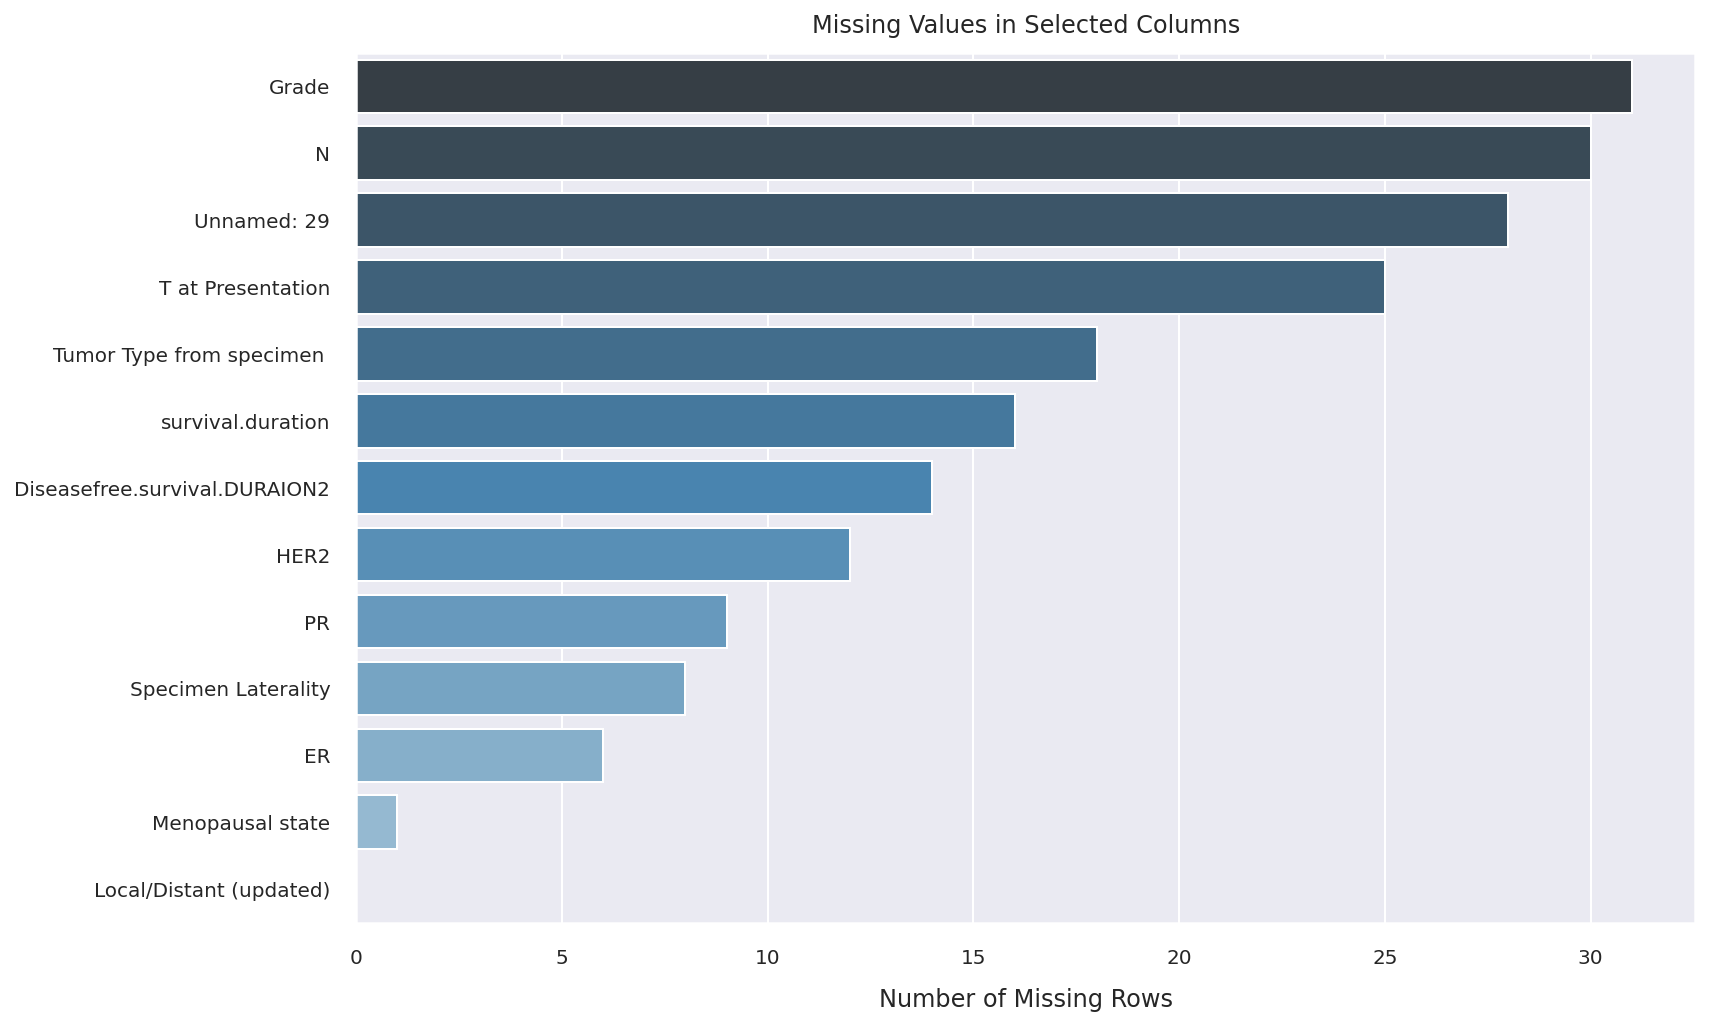

In [ ]:
# Select only the specified columns from the DataFrame
selected_data = Baheya[columns]

# Create a bar plot for missing values in the selected columns
fig = plt.figure(figsize=(12, 8))
sns.barplot(x=selected_data.isnull().sum().sort_values(ascending=False).values,
            y=selected_data.isnull().sum().sort_values(ascending=False).index,
            palette='Blues_d')

plt.xlabel('Number of Missing Rows', size=12, labelpad=10)
plt.ylabel('')
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.title('Missing Values in Selected Columns', size=12, pad=10)

plt.show()


In [ ]:
# Assuming you have a DataFrame named 'Baheya'
unique_values = Baheya['T at Presentation'].unique()

# Print the unique values
print(unique_values)

['T3' 'T2' 'T4' 'Tis' 'T1' 'Tx' nan 'High']


In [ ]:
value_counts = Baheya['T at Presentation'].value_counts()

# Print the count of each unique value
print(value_counts)

T2      63
T4      55
T3      37
T1      27
Tis      7
Tx       4
High     1
Name: T at Presentation, dtype: int64


In [ ]:
def update_tumor_size(value):
    if value == 'Tis':
        return 0
    elif value == 'T1':
        return 1
    elif value == 'T2':
        return 2
    elif value == 'T3':
        return 3
    elif value == 'T4':
        return 4
    elif value == 'Tx':
        return -1
    elif value == 'High':
        return 4
    else:
        return None

Baheya['T at Presentation'] = Baheya['T at Presentation'].apply(update_tumor_size)


In [ ]:
Baheya['T at Presentation'] = Baheya.groupby(['Tumor Type from specimen '])['T at Presentation'].apply(lambda x: x.fillna(x.median()))
Baheya['T at Presentation'] = Baheya['T at Presentation'].fillna(mode(Baheya['T at Presentation'])[0][0])

In [ ]:
columns = ['Menopausal state','T at Presentation','N',
           'Grade','Tumor Type from specimen ','ER', 'PR', 'HER2','Specimen Laterality', 'Unnamed: 29',
           'survival.duration','Diseasefree.survival.DURAION2','Local/Distant (updated)']

missing_counts = Baheya[columns].isnull().sum()
missing_columns = missing_counts[missing_counts > 0].index.tolist()

print("Columns with missing values:")
for column in missing_columns:
    print(f"{column}: {missing_counts[column]} missing values")

Columns with missing values:
Menopausal state: 1 missing values
N: 30 missing values
Grade: 31 missing values
Tumor Type from specimen : 18 missing values
ER: 6 missing values
PR: 9 missing values
HER2: 12 missing values
Specimen Laterality: 8 missing values
Unnamed: 29: 28 missing values
survival.duration: 16 missing values
Diseasefree.survival.DURAION2: 14 missing values


In [ ]:
unique_values = Baheya['N'].unique()

# Print the unique values
print(unique_values)

['N3' 'N2' 'Nx' 'N1' 'N0' nan]


In [ ]:
value_counts = Baheya['N'].value_counts()

# Print the count of each unique value
print(value_counts)

N1    65
N0    61
N3    28
N2    26
Nx     9
Name: N, dtype: int64


In [ ]:
def update_lymph_node(value):
    if value == 'Nx':
        return -1
    elif value == 'N0':
        return 0
    elif value == 'N1':
        return 1
    elif value == 'N2':
        return 2
    elif value == 'N3':
        return 3
    else:
        return None

Baheya['N'] = Baheya['N'].apply(update_lymph_node)


In [ ]:
Baheya['N'] = Baheya.groupby(['Tumor Type from specimen '])['N'].apply(lambda x: x.fillna(x.mode()))
Baheya['N'] = Baheya['N'].fillna(mode(Baheya['N'])[0][0])

In [ ]:
columns = ['Menopausal state','T at Presentation','N',
           'Grade','Tumor Type from specimen ','ER', 'PR', 'HER2','Specimen Laterality', 'Unnamed: 29',
           'survival.duration','Diseasefree.survival.DURAION2','Local/Distant (updated)']

missing_counts = Baheya[columns].isnull().sum()
missing_columns = missing_counts[missing_counts > 0].index.tolist()

print("Columns with missing values:")
for column in missing_columns:
    print(f"{column}: {missing_counts[column]} missing values")

Columns with missing values:
Tumor Type from specimen : 18 missing values
PR: 9 missing values
HER2: 12 missing values
Specimen Laterality: 8 missing values
Unnamed: 29: 28 missing values
survival.duration: 16 missing values
Diseasefree.survival.DURAION2: 14 missing values


In [ ]:
unique_values = Baheya['Menopausal state'].unique()

# Print the unique values
print(unique_values)

['Pre-M' 'Post-M' 'Unrecorded' nan]


In [ ]:
value_counts = Baheya['Menopausal state'].value_counts()

# Print the count of each unique value
print(value_counts)

Post-M        109
Pre-M         100
Unrecorded      9
Name: Menopausal state, dtype: int64


In [ ]:
import numpy as np
Baheya['Menopausal state'] = Baheya['Menopausal state'].replace('Unrecorded', np.nan)


In [ ]:
Baheya['Menopausal state'] = Baheya['Menopausal state'].fillna(mode(Baheya['Menopausal state'])[0][0])

In [ ]:
unique_values = Baheya['Grade'].unique()

# Print the unique values
print(unique_values)

[2 3 nan 'High' 1 'high' 'low' 'Intermediate']


In [ ]:
value_counts = Baheya['Grade'].value_counts()

# Print the count of each unique value
print(value_counts)

2               107
3                64
1                 6
High              5
Intermediate      4
high              1
low               1
Name: Grade, dtype: int64


In [ ]:
def update_Grade(value):
    if value == 'High' or value == 'high' or value == 3:
        return 3
    elif value == 'Intermediate' or value == 2:
        return 2
    elif value == 'low' or value == 1:
        return 1
    else:
        return None

Baheya['Grade'] = Baheya['Grade'].apply(update_Grade)


In [ ]:
Baheya['Grade'] = Baheya.groupby(['Tumor Type from specimen '])['Grade'].apply(lambda x: x.fillna(x.mode()))
Baheya['Grade'] = Baheya['Grade'].fillna(mode(Baheya['Grade'])[0][0])

In [ ]:
unique_values = Baheya['PR'].unique()

# Print the unique values
print(unique_values)

In [ ]:
value_counts = Baheya['PR'].value_counts()

# Print the count of each unique value
print(value_counts)

Positive      154
Negative       54
Unrecorded      1
Nrgative        1
Name: PR, dtype: int64


In [ ]:
import numpy as np
Baheya['PR'] = Baheya['PR'].replace('Unrecorded', np.nan)

In [ ]:
def update_PR(value):
    if value == 'Nrgative' or value == 'Negative':
        return 'Negative'
    elif value == 'Positive':
        return 'Positive'
    else:
        return None

Baheya['Grade'] = Baheya['Grade'].apply(update_Grade)


In [ ]:
Baheya['ER'] = Baheya['ER'].fillna(Baheya['ER'].mode()[0])